In [77]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline 
rnd.seed()

class Chatbot():
    
    def __init__(self,greetings,questions,reaction,farewells,questions_user=None,answers=None):
        '''
        Initialize the chatbot given the input arguments
        (is called when creating an object of the class Chatbot)
        
        input:  greetings:      list of strings - predefines which greetings the bot can use
                questions:      list of strings - predefines the questions the bot can ask
                reaction:       function - decides how to react to the answers made by the user
                questions_user: list of strings - predefines which questions the user might ask the bot (Ex. 1b)
                answers:        list of strings - predefines the answers of the bot given a specific question of the user
                farewells:      list of strings - predefines how the bot can say goodbye
        
        '''
        self.reaction = reaction#function 
        self.greetings = greetings
        self.questions = questions
        self.questions_user = questions_user
        self.answers = answers
        self.farewells = farewells
        #during the conversation the bot has to ask all questions
        #question index is removed in askQuestion() if question was asked
        self.notAsked = range(0,len(questions))
        self.shownGauss = 0#boolean - has to be changed to 0 for Question 1c
    

    
    def greeting(self):
        '''
        Question 1a)
        The bot outputs randomly a greeting given all possible greetings in self.greetings
        Afterwards, the bot asks for the name of the user and reacts by saying 'Nice to meet you USER',
        where USER has to be replaced by the input made from the user.
        
        Question 1b)
        After greeting the user the Bot has to check if the user asked questions during his last input.
        If yes, he has to answer them. For extracting the different parts of the users input (in case
        he asked a question) you can use self.extractParts(user_input,delimiter)
        '''
        x = rnd.randint(0,2)
        print(self.greetings[x])
        
        
        userinput = input('User: ')
        sentence = self.extractParts(userinput,str(' '))
        Nameuser = str()
        #suche name,relativ einfach gehalten
        for i in range(len(sentence)-1):
            if sentence[i]==str('is') or sentence[i]==str('am'):
                Nameuser += str(" ")+(sentence[i+1])
                break
        
        print('Chatbot: Nice to meet you',Nameuser)
        question=self.isQuestion(sentence)
        
        if question:
            self.answerQuestion(sentence)
        
        
        
        #COMPLETE
        
    def askQuestion(self):
        '''
        Question 1a)
        The bot outputs randomly a question given all possible questions in self.questions
        If the question was asked, it should be removed from the variable self.notAsked.
        Afterwards, the bot should react to the answer of the user by using the input of the user.
        Example: 
            Question_bot: What are your hobbies? 
            Answer_user: football, meeting friends
            Reaction_Bot: I don't like football, but I like meeting friends
            
        How the bot reacts to which question has to be given by the function self.reaction
        For extracting the different parts of the answer (1st part is 'football', second is 'meeting friends')
        you can use the function self.extractParts()
        
        Question 1b)
        After reacting to the answer of the user the Bot has to check if the user asked questions during his last input.
        If yes, he has to answer them. For extracting the different parts of the users input (in case
        he asked a question) you can use self.extractParts(user_input,delimiter)
        '''
        number = rnd.choice(self.notAsked)
        print(self.questions[number])        
        
        
        user_input = input('User: ')
        parts = self.extractParts(user_input,str(' '))
        singleanswer=[]
        #teile antwort in einzelne parts auf für reaction bot
        for i in range(len(parts)):
            if parts[i]==str('and'):
                parts[i]==str('and')
               #ignoriere ands
            elif parts[i][-1] == str(','):
                x=list(parts[i])
                x.pop(-1)
                parts[i]=''.join(x)
                singleanswer.append(parts[i])
                #lösche kommas und punkte
            elif parts[i][-1] == str('.'):
                x=list(parts[i])
                x.pop(-1)
                parts[i]=''.join(x)
                singleanswer.append(parts[i])
                break
            elif parts[i]==parts[-1]:
                singleanswer.append(parts[i])
                #micht das letzte elemt vergessen(passiert manchmal ka why)
            elif parts[i+1]!=str('and'):
                parts[i]+=str(' ')+str(parts[i+1])
                parts[i+1]=str('and')
                singleanswer.append(parts[i])
                #falls eine antwort aus 2 wörten besteht we meeting friends
            else:
                singleanswer.append(parts[i])
            
        #reaction bpt
        
        self.reaction(str('askQuestion'),self.questions[number],singleanswer)
        self.questions.pop(number)
        self.notAsked = range(0,len(self.questions))
        
        #reaction bpt
        question=self.isQuestion(parts)

        if question:
            self.answerQuestion(parts)
        #COMPLETE
        
    def farewell(self):
        '''
        Question 1a)
        The bot outputs randomly a farewell given all possible greetings in self.farewells
        '''
        x = rnd.randint(0,2)
        print(self.farewells[x])
        #COMPLETE
                                 
    
    
    def answerQuestion(self,user_input):
        '''
        Question 1b)
        This function finds the appropriate answer to the question(s) made by the user.
        First, the question has to be find in self.questions_user. This then leads to the index
        needed to find the right answer of the bot using self.answers.
        
        Input: user_input: list of strings - contains the parts of the user's input
        Output: answers: all answers to the questions made from the user in his/her current input
    
        '''
        
        for i in range(len(user_input)):
            
            if user_input[i]==str('hobbies'):
                print(self.answers[0])
            if user_input[i]==str('color') or user_input[i]==str('colour'):
                print(self.answers[1])
            if user_input[i]==str('food'):
                print(self.answers[2])
        for i in range(len(user_input)):
            x=list(user_input[i])
            x.pop(-1)
            user_input[i]=''.join(x)
            if user_input[i]==str('hobbies'):
                print(self.answers[0])
            if user_input[i]==str('color') or user_input[i]==str('colour'):
                print(self.answers[1])
            if user_input[i]==str('food'):
                print(self.answers[2])
        #COMPLETE
        
        #return answers
    
    
    
    def isQuestion(self,user_input):
        '''
        Question 1b)
        This function checks if the user asked a question during his last input.
        Input:  user_input: list of strings - contains the parts of the user's input
        Output: a boolean variable, stating if one of the user_input parts contains a questionmark or not
        '''
        #kp warum das hier stehen muss, funzt aber anders bei mir nicht
        x = False
        for i in range(len(user_input)):
                if user_input[i][-1]==str('?'):
                    return True
                    

        return x
        #COMPLETE
        
    def extractParts(bot,user_input,delimiter,outputType = str):
        '''
        Find the different parts of the users input, by splitting the string 'user_input' in its parts
        using the delimiter specified as input. If necessary, the output can be of a different type than
        string (for example float)
        
        Input:
            user_input: input made by the user
            delimiter:  substring which identifies the end and start of a part
            outputType: type of the elements in the output list 'parts'
        
        Output:
            parts: list of strings - contains the parts of the user's input in the sepecified type
        '''
        #kp warum das hier stehen muss, funzt aber anders bei mir nicht
        parts = [outputType(x.strip()) for x in user_input.split(delimiter)]
        
        return parts

    def plotGauss(self):
        '''
        Question 1c)
        This function let the chatbot plot two Gauss Curves given a mean and two different standard deviations
        chosen by the user.
        
        Use the function "norm" from the library scipy.stats to compute the function values y1 and y2
        given x, the mean and the two standard deviations std1 and std2
        Plot both functions (as subplots) using the library matplotlib.pyplot.
        Play a little bit around with the properties one can set for the plots
        (like setting a title,changing the line color etc etc)
        '''
        self.shownGauss=1
        user_input=input("Chatbot: Do you want to see how a Gauss curve looks like? \n")
        if user_input.lower()=='yes':
            user_input = input("Chatbot: Cool! Then you need to give me a random number between 0 and 1 for the mean \n")
            mean = float(user_input)
            user_input = input("Chatbot: I want to show you 2 Gaussians with different standard deviations. So I need two numbers now between 0 and 1 \n")
            stds = self.extractParts(user_input,',',outputType=float)
            
            sigma1=stds[0]
            sigma2=stds[1]
            x1 = np.linspace(mean-5*sigma1,mean+5*sigma1, 100)
            x2 = np.linspace(mean-5*sigma2,mean+5*sigma2, 100)


            plt.figure(1)
            plt.subplot(121)
            plt.plot(x1, norm.pdf(x1,mean,sigma1),'r')
            plt.xlabel('x')
            plt.ylabel('Probabilitydensity')
            plt.subplot(122)
            plt.plot(x2, norm.pdf(x2,mean,sigma2),'b')
            plt.xlabel('x')
            plt.ylabel('Probabilitydensity')
            plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
            plt.show()
            #COMPLETE
            
        elif user_input.lower()=='no':
            print("Chatbot: Oh... ok.")
            
    def main(self):
        '''
        main function to perform the conversation between chatbot and user
        starts with greeting, then asks all available questions and ends with a farewell
        
        The part with the Gauss curve only applies for Question 1c.
        Change the boolean variable self.shownGauss to 0, so that the function plotGauss will be executed
        during the conversation.
        '''
        self.greeting()
        while not len(self.notAsked)==0:#ask questions until all questions are asked
            self.askQuestion()
            if not self.shownGauss:#plot Gauss if it hasn't been done already
                prob = 1 if len(self.notAsked)==0 else rnd.randint(0,1)#plot with probability of 50% or 100% if last question was asked
                if prob: self.plotGauss()
        self.farewell()








if __name__ == "__main__":
    
    
    
    def reaction(bot,question,answer):
        '''
        Question 1a)
        Determines the reaction of the chatbot to an answer given by the user after the bot asked a question
        Input:
            bot:        Object of the class Chatbot
            question:   string - containing the question the bot asked
            answer:     string - containing the answer of the user to the question of the bot
        Output: nothing - the output/reaction should be printed in the console
        '''
        #einfach gehaltene reaction i like and i dont. nimmt oben bei question die einzelnen antworten
        if bot == str('askQuestion'):
            answerstohobby = ('Chatbot: I like','Chatbot: I dont like')
            for j in range(len(answer)):
                zufallsnumb=rnd.randint(0,1)
                print(answerstohobby[zufallsnumb],answer[j])
                
        
        #COMPLETE

        
    bot = Chatbot(greetings = ['Chatbot: Greetings human, I am Chatbot. May you tell me your name?','Chatbot: Hello human, my name is Chatbot. What is your name?', 'Chatbot: Welcome human, you are speaking with Chatbot. May i ask for your name?'],
              questions = ['Chatbot: What are your hobbies?','Chatbot: What is your favorit food?','Chatbot: What is your favorit colour?'],
              reaction = reaction,
              questions_user = ['What are your hobbies?','What is your favorite colour?','What is your favorite food?'],
              answers =  ['I like humiliating humans.','Black and white.','Zeros and ones.' ],
              farewells = ['Chatbot: Cheers my friend!','Chatbot: See you in a bit!','Chatbot: See ya later homie!'])
    bot.main()


Chatbot: Welcome human, you are speaking with Chatbot. May i ask for your name?
User: as
Chatbot: Nice to meet you 
Chatbot: What is your favorit food?
User: as
Chatbot: I like as
Chatbot: Do you want to see how a Gauss curve looks like? 
no
Chatbot: Oh... ok.
Chatbot: What is your favorit colour?
User: a
Chatbot: I like a
Chatbot: What are your hobbies?
User: a
Chatbot: I like a
Chatbot: See ya later homie


In [17]:
import matplotlib.pyplot as plt
from scipy.stats import norm
'''
        Question 1c)
        This function let the chatbot plot two Gauss Curves given a mean and two different standard deviations
        chosen by the user.
        
        Use the function "norm" from the library scipy.stats to compute the function values y1 and y2
        given x, the mean and the two standard deviations std1 and std2
        Plot both functions (as subplots) using the library matplotlib.pyplot.
        Play a little bit around with the properties one can set for the plots
        (like setting a title,changing the line color etc etc)
        '''
def extractParts(user_input,delimiter,outputType = str):

        #kp warum das hier stehen muss, funzt aber anders bei mir nicht
        parts = [outputType(x.strip()) for x in user_input.split(delimiter)]
        
        return parts
user_input=input("Chatbot: Do you want to see how a Gauss curve looks like? \n")
if user_input.lower()=='yes':
    user_input = input("Chatbot: Cool! Then you need to give me a random number between 0 and 1 for the mean \n")
    mean = float(user_input)
    user_input = input("Chatbot: I want to show you 2 Gaussians with different standard deviations. So I need two numbers now between 0 and 1 \n")
    stds = extractParts(user_input,',',outputType=float)
    print(stds)
            

Chatbot: Do you want to see how a Gauss curve looks like? 
yes
Chatbot: Cool! Then you need to give me a random number between 0 and 1 for the mean 
0.5
Chatbot: I want to show you 2 Gaussians with different standard deviations. So I need two numbers now between 0 and 1 
0.2, 0.4
[0.2, 0.4]


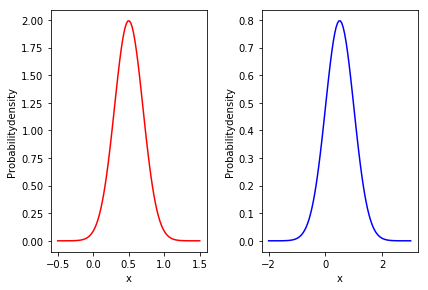

In [78]:
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline 
mean=0.5
sigma1=0.2
sigma2=0.5
x1 = np.linspace(mean-5*sigma1,mean+5*sigma1, 100)
x2 = np.linspace(mean-5*sigma2,mean+5*sigma2, 100)

#mean, var, skew, kurt = norm.stats(moments='mvsk')
plt.figure(1)
plt.subplot(121)
plt.plot(x1, norm.pdf(x1,mean,sigma1),'r', label='norm pdf')
plt.xlabel('x')
plt.ylabel('Probabilitydensity')
plt.subplot(122)
plt.plot(x2, norm.pdf(x2,mean,sigma2),'b', label='norm pdf')
plt.xlabel('x')
plt.ylabel('Probabilitydensity')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()


In [ ]:


print(questions)
print(x)

In [ ]:
var = input()
'''for i in range(len(var)):
    if var[i]==str()
'''

def extractParts(user_input,delimiter,outputType = str):
    parts = [outputType(x.strip()) for x in user_input.split(delimiter)]
        
    return parts
parts=extractParts(var,str(' '))
Name = []
print(parts)
Nameuser = str(" ")
for i in range(len(parts)):
    if parts[i]==str("is"):
        for j in range(i+1,len(parts)):
            Nameuser +=str(" ")+(parts[j])
            print(Nameuser)
print(Nameuser)


In [ ]:
print(parts)
k=parts
k.remove('my')
print(k)
print(parts)

In [ ]:
questions = ['What are your hobbies?','What is your favorit food?','What is your favorit colour?']
questions.pop(1)
print(questions)

In [ ]:

questions = ['What are your hobbies?','What is your favorit food?','What is your favorit colour?']
asked=range(0,len(questions))
x=rnd.choice(asked)
print(x,asked,questions[x])
questions.pop(x)


print(questions)
print(range(0,len(questions)))

In [ ]:
questions = ['What','','copr?']
print(questions[-1][-1])


In [ ]:
x=('hall','my.','like?')
def isQuestion(user_input):
        '''
        Question 1b)
        This function checks if the user asked a question during his last input.
        Input:  user_input: list of strings - contains the parts of the user's input
        Output: a boolean variable, stating if one of the user_input parts contains a questionmark or not
        '''
        print('nein1')
        x = False
        for i in range(len(user_input)):
                print(len(user_input),user_input[i])
                if user_input[i][-1]==str('?'):
                    print('blubb')
                    return True
                    

        return x
        #COMPLETE
k=isQuestion(x)
print(k)
if k is True:
    print('hallo')

In [52]:
hobbies=['football,','meeting', 'friends.','and','gaming']
singleanswer=[]
for i in range(len(hobbies)-1):
    print(i)
    if hobbies[i][-1] == str(','):
        x=list(hobbies[i])
        x.pop(-1)
        hobbies[i]=''.join(x)
        singleanswer.append(hobbies[i])
        print(singleanswer,i)
    elif hobbies[i]==str('and'):
        hobbies[i]=(str('and'))
    elif hobbies[i]==hobbies[-1]:
        singleanswer.append(hobbies[i])
        print(i)
    else:
        hobbies[i]+=str(' ')+str(hobbies[i+1])
        print(hobbies[i])
        hobbies.pop(i+1)
        singleanswer.append(hobbies[i])
        print(singleanswer,i)

print(singleanswer,'end')
    


0
['football'] 0
1
meeting friends.
['football', 'meeting friends.'] 1
2
3
3
['football', 'meeting friends.', 'gaming'] end


In [35]:
x='football,'
p=list(x)
print(p)
p.remove(str(','))
x=''.join(p)
print(x)

['f', 'o', 'o', 't', 'b', 'a', 'l', 'l', ',']
football
